In [1]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
import numpy as np

sns.set(rc={"font.size":13,"axes.labelsize":13,"xtick.labelsize":13,"ytick.labelsize":13,"savefig.dpi":200,"figure.figsize":(7, 2.5 ),"lines.linewidth": 2})
sns.set_style("white")
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('SiGraph/node_accelerator_duty_cycle.csv')

In [3]:
def map_type_to_group(type_value):
    if 'A100' in type_value:
        return 'A100'
    elif 'A10' in type_value:
        return 'A10'
    elif 'A100' in type_value:
        return 'A100'
    elif 'A800' in type_value:
        return 'A800'
    elif 'H800' in type_value:
        return 'H100'
    elif 'PPU' in type_value:
        return 'xPU'
    # elif 'Quadro' in type_value:
        # return 'Quadro'
    elif 'GeForce' in type_value:
        return 'RTX'
    elif 'Tesla_T4' in type_value:
        return 'T4'
    elif 'Tesla_P100' in type_value:
        return 'P100'
    elif 'Tesla_V100' in type_value:
        return 'V100'
    
    else:
        return 'Other'

In [4]:
df['group'] = df['type'].apply(map_type_to_group)

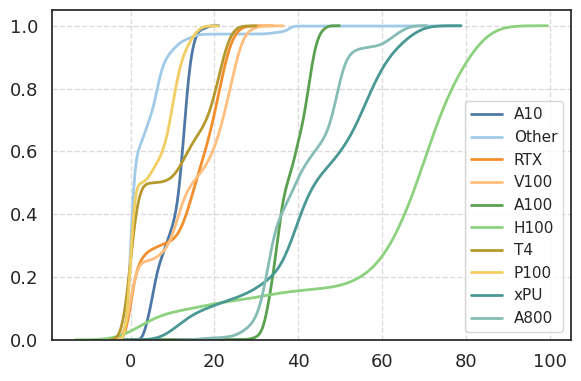

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
colors=["#4E79A7",  "#A0CBE8",  "#F28E2B",  "#FFBE7D",  "#59A14F",  "#8CD17D",  "#B6992D",  "#F1CE63",  "#499894",  "#86BCB6",  "#E15759",  "#E19D9A"]
for index,name in enumerate(df['group'].unique(), start=0):
    data = df[df['group'] == name]['value']
    # sns.ecdfplot(data, stat='proportion', label=name, linewidth=1.5, color = colors[index])
    sns.kdeplot(data, cumulative=True, color=colors[index], label=name)
# sns.ecdfplot(data=df, x="value", hue="group",stat='proportion', linewidth=1.5, palette=colors)
# Set plot properties
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid(True,linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
df


,time,value,metric,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,type,group
0,1699603200,13.147290,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,A10,A10
1,1699603200,13.380413,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,NVIDIA_A30,Other
2,1699603200,20.501488,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,GeForce_RTX_3090,RTX
3,1699603200,0.000000,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,NVIDIA_Tesla_V100-SXM2-16GB,V100
4,1699603200,20.350987,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,GeForce_RTX_2080_Ti,RTX
...,...,...,...,...,...,...,...,...,...
119691,1700802600,32.153201,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,NVIDIA_A100-SXM-80GB,A100
119692,1700804100,33.133834,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,NVIDIA_A100-SXM-80GB,A100
119693,1700802000,32.852510,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,NVIDIA_A100-SXM-80GB,A100
119694,1700804400,32.508414,node_accelerator_duty_cycle,NaN,NaN,NaN,NaN,NVIDIA_A100-SXM-80GB,A100


/tmp/ipykernel_1701316/2973138306.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="group", y="value", data=df, palette=colors, ci=None, ax=ax)


Text(0.5, 0, '')

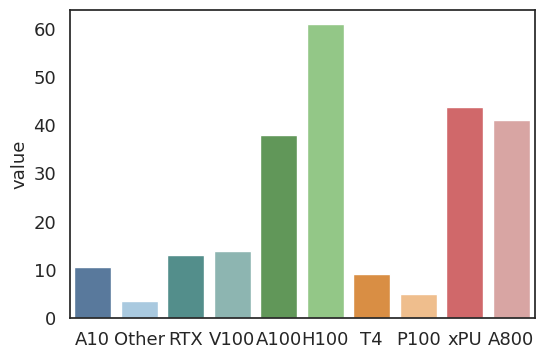

In [7]:
# using seaborn plot the barplot  of each group
fig, ax = plt.subplots(figsize=(6, 4))
colors=[ "#A0CBE8","#4E79A7",  "#86BCB6","#499894",   "#8CD17D","#59A14F",  "#FFBE7D","#F28E2B",    "#E19D9A","#E15759",  "#F1CE63",  "#B6992D"]
# colors=["#F2AF82","#BCD5AB","#FFD966","#BDD5ED","#F17B6D","#F2AF82","#BCD5AB","#FFD966","#BDD5ED","#F17B6D","#302d22","#c1070f"]
sns.barplot(x="group", y="value", data=df, palette=colors, ci=None, ax=ax)


plt.title('')
plt.xlabel('')

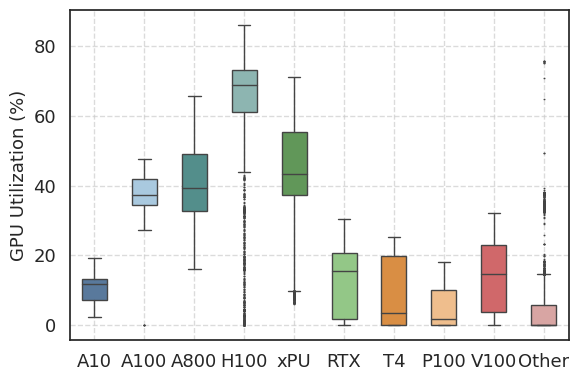

In [9]:
#  画箱线图
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x="group", y="value", data=df, palette=colors, ax=ax, width=0.5, linewidth=1, fliersize=0.4,order=['A10', 'A100', 'A800', 'H100', 'xPU', 'RTX', 'T4', 'P100', 'V100', 'Other'])
ax.grid(True,linestyle='--', alpha=0.7)
ax.set_xlabel('', fontsize=11)
ax.set_ylabel('GPU Utilization (%)')
plt.tight_layout()
fig.savefig('plots/gpu_util_boxplot.pdf', bbox_inches='tight')
plt.show()



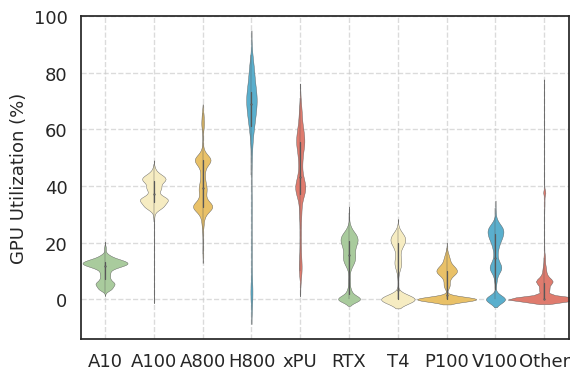

In [34]:
# plot violin plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(x="group", y="value", data=df, palette=colors, ax=ax, width=1.5, linewidth=0.3, order=['A10', 'A100', 'A800', 'H800', 'xPU', 'RTX', 'T4', 'P100', 'V100', 'Other'])
ax.grid(True,linestyle='--', alpha=0.7)
ax.set_xlabel('', fontsize=11)
ax.set_ylabel('GPU Utilization (%)')
plt.tight_layout()
# fig.savefig('plots/gpu_util_violin.pdf', bbox_inches='tight')
plt.show()